In [1]:
from   sklearn.cluster         import KMeans
import pandas                  as     pd
from   sklearn.datasets        import load_iris
import matplotlib.pyplot       as     plt
import seaborn                 as     sns
from   sklearn.metrics         import silhouette_score
import plotly.express          as     px
from   sklearn.metrics         import adjusted_rand_score
from   sklearn.preprocessing   import StandardScaler
from   sklearn.decomposition   import PCA
from   sklearn.cluster         import DBSCAN
from   sklearn.cluster         import AgglomerativeClustering
from   scipy.cluster.hierarchy import linkage, dendrogram
import joblib

In [2]:
iris = load_iris()

In [3]:
X = iris.data

In [4]:
# créer un modèle de clustering KMean
kmeans = KMeans(n_clusters=3, random_state=42)

In [5]:
# La feature dans le modèle
kmeans.fit(X)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [6]:
# Les étiquettes dans le dataframe
iris_df['cluster'] = kmeans.labels_

Text(0.5, 1.0, "K-Mean Clustering de l'ensemble de données Iris")

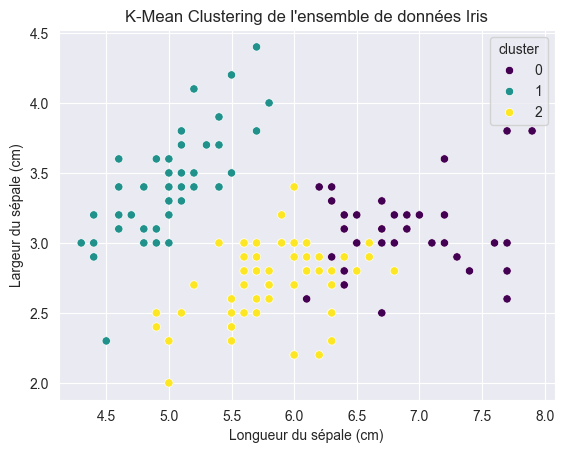

In [7]:
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=iris_df['cluster'], palette='viridis')
plt.xlabel('Longueur du sépale (cm)')
plt.ylabel('Largeur du sépale (cm)')
plt.title("K-Mean Clustering de l'ensemble de données Iris")

In [8]:
# Évaluation de la Qualité du Clustering
print(f"Inertie du modèle: {kmeans.inertia_}")

Inertie du modèle: 78.8556658259773


In [9]:
# Mesure la cohésion et la séparation des clusters (valeur entre -1 et 1, plus proche de 1 = meilleur).
score = silhouette_score(X, kmeans.labels_)
print(f"La silhouette Score est {score:.2f}")

La silhouette Score est 0.55


Text(0.5, 1.0, 'Méthode du Coude pour K-Means')

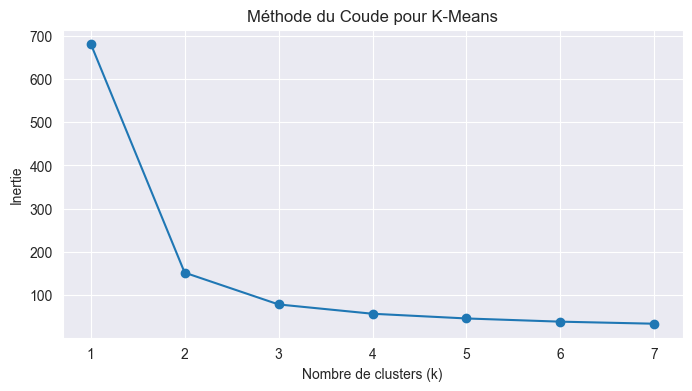

In [10]:
# Quel est le nombre optimal de clusters (Elbow Method (Méthode du Coude)) ?
inertias = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 8), inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du Coude pour K-Means")

In [11]:
# Visualiser en 3D pour mieux voir la séparation des clusters
fig = px.scatter_3d(
    iris_df,
    x='sepal length (cm)',
    y='sepal width (cm)',
    z='petal length (cm)',
    color='cluster',
    title="Clustering K-Means 3D sur Iris"
)
fig.show()

Text(0.5, 1.02, 'Pair Plot des Features par Cluster')

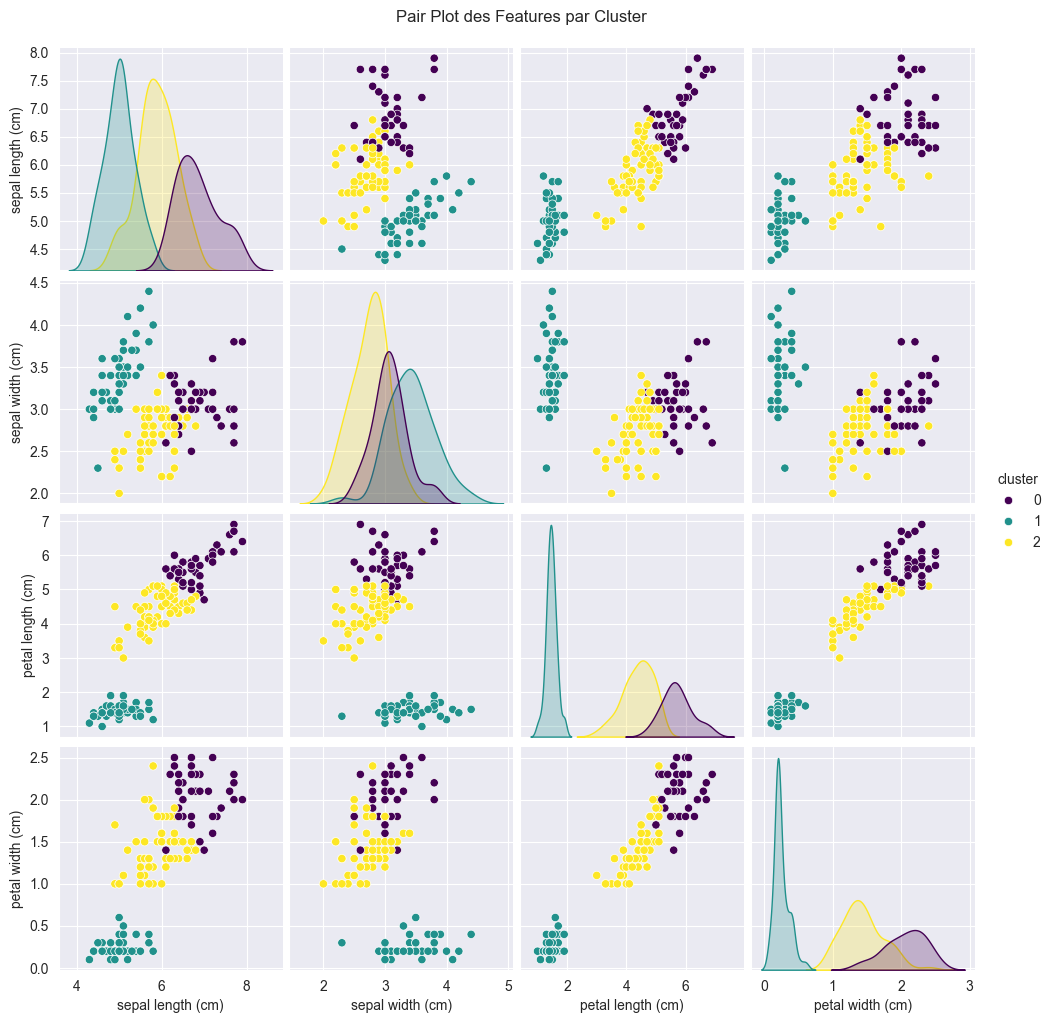

In [12]:
# Visualiser les relations entre toutes les paires de features
sns.pairplot(iris_df, hue='cluster', palette='viridis')
plt.suptitle("Pair Plot des Features par Cluster", y=1.02)

Text(0.5, 1.0, 'K-Means avec Centroïdes')

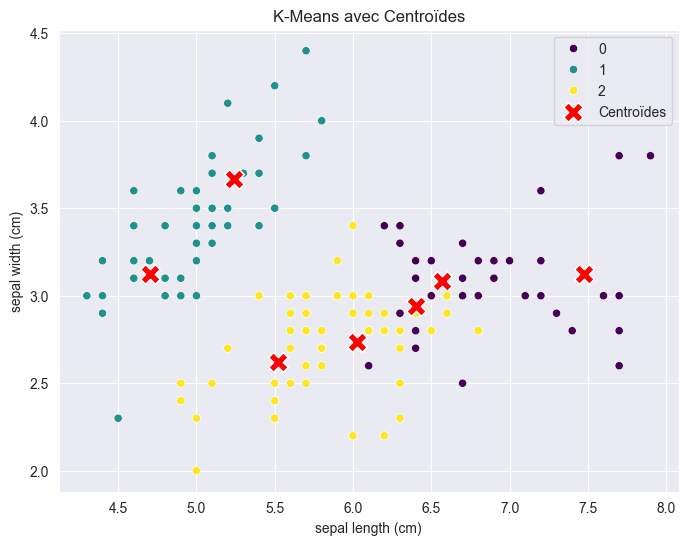

In [13]:
# Afficher au graphique les centroïdes des clusters | Quelle est la position des points centraux ? (comprendre la structure des données et d'interpréter les résultats du clustering)
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=iris.feature_names)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster', palette='viridis')
sns.scatterplot(data=centroids_df, x='sepal length (cm)', y='sepal width (cm)', color='red', marker='X', s=200, label='Centroïdes')
plt.legend()
plt.title("K-Means avec Centroïdes")

In [14]:
# Comparer avec les vrais labels
ari = adjusted_rand_score(iris.target, kmeans.labels_)
print(f"Adjusted Rand Index: {ari:.2f}")  # 1 = parfait, 0 = aléatoire

Adjusted Rand Index: 0.48


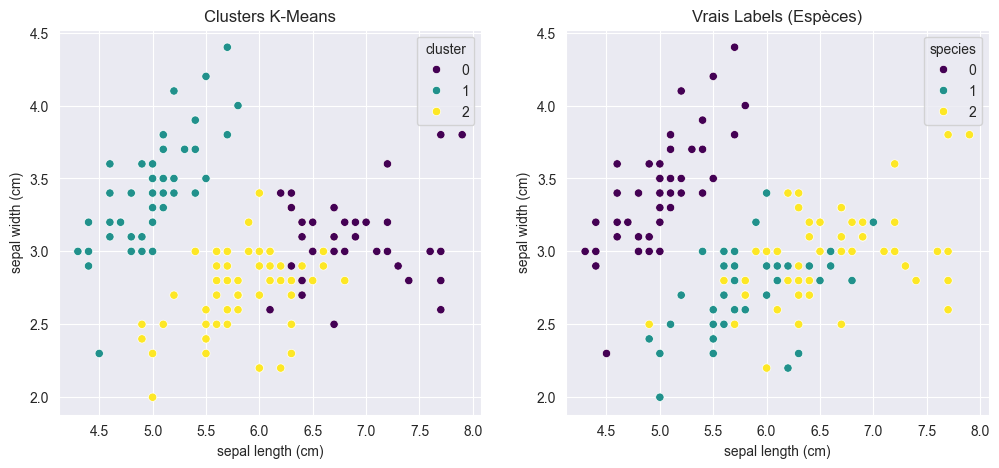

In [15]:
# Visualiser Side-by-Side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster', palette='viridis', ax=axes[0])
axes[0].set_title("Clusters K-Means")

# Visualiser avec les vrais labels
iris_df['species'] = iris.target
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='viridis', ax=axes[1])
axes[1].set_title("Vrais Labels (Espèces)")
plt.show()

In [16]:
# Normaliser les donées
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_scaled = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
iris_df['cluster_scaled'] = kmeans_scaled.labels_

Text(0.5, 1.0, 'Clusters après PCA')

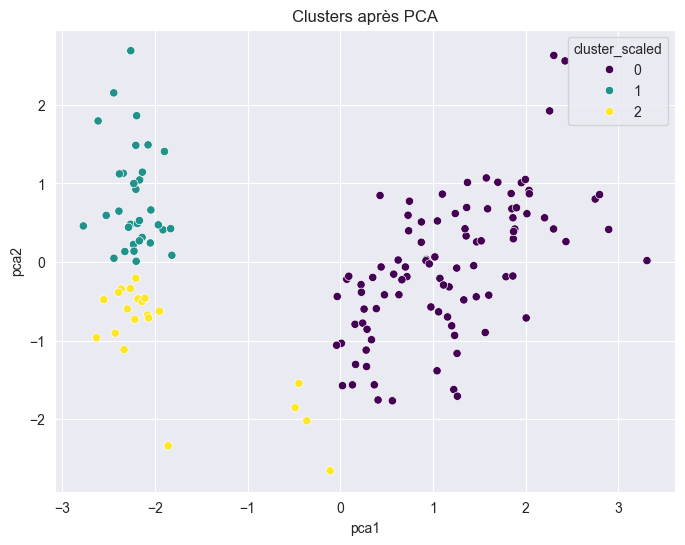

In [17]:
# Utiliser PCA pour une visualisation en 2D plus claire
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

iris_df['pca1'] = X_pca[:, 0]
iris_df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x='pca1', y='pca2', hue='cluster_scaled', palette='viridis')
plt.title("Clusters après PCA")

Text(0.5, 1.0, 'Clustering avec DBSCAN')

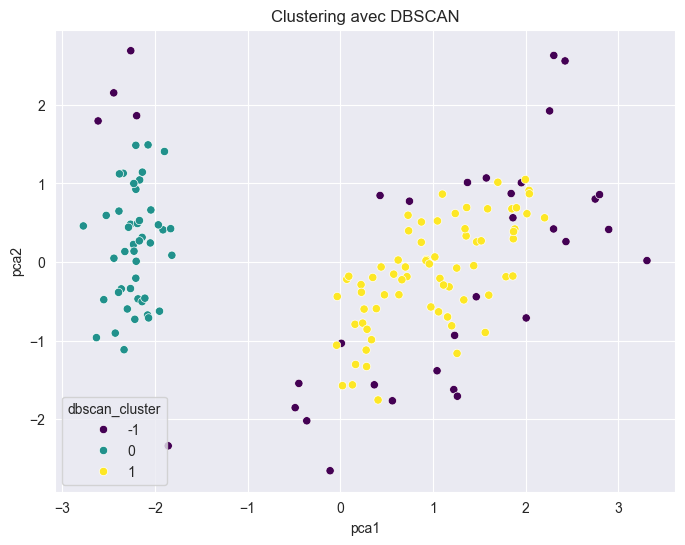

In [18]:
# Explorer avec l'algo DBSCQN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
iris_df['dbscan_cluster'] = dbscan.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x='pca1', y='pca2', hue='dbscan_cluster', palette='viridis')
plt.title("Clustering avec DBSCAN")

Text(0.5, 1.0, 'Dendrogramme du Clustering Hiérarchique')

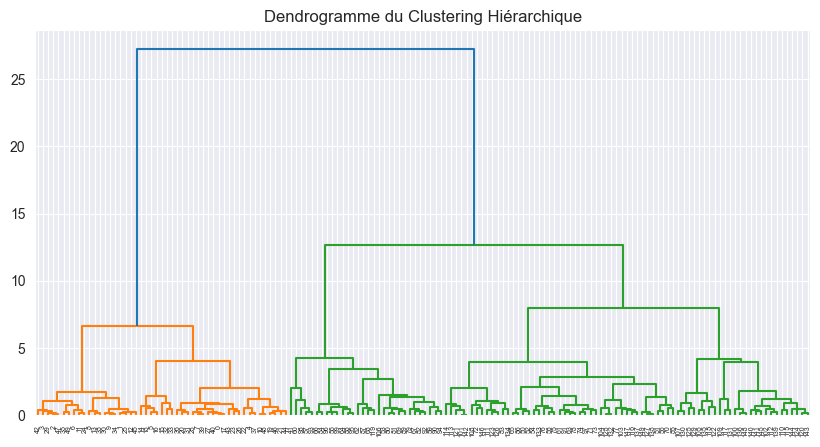

In [19]:
agg = AgglomerativeClustering(n_clusters=3).fit(X_scaled)
iris_df['agg_cluster'] = agg.labels_

Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogramme du Clustering Hiérarchique")

In [20]:
# Interpréter la biologie
iris_df.groupby('cluster').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_scaled,pca1,pca2,dbscan_cluster,agg_cluster
cluster,,,,,,,,,,
0,6.853846,3.076923,5.715385,2.053846,1.923077,0.000000,1.906939,0.606297,0.230769,0.00000
1,5.006000,3.428000,1.462000,0.246000,0.000000,1.340000,-2.224753,0.288927,-0.100000,1.02000
2,5.883607,2.740984,4.388525,1.434426,1.229508,0.131148,0.604377,-0.624458,0.540984,0.95082


In [21]:
# Déployer et partager
joblib.dump(kmeans, 'kmeans_iris.pkl')

['kmeans_iris.pkl']